# HR ANALYTICS PROJECT

Name: Kuwar Preetikumari

***Understanding the Problem Statement:***

**The data from HR domain was given to bring out some key insights especially about Salary. The data had 5049 rows and 19 columns. Regression models like RandomForestRegressor, Lasso regression and KNN regression are used for the prediction of Salary. Here, Salary was considered the Target while other variables as independent features. Hyperparameter tuning is done to enhance the performance of the model. Feature Selection techniques were applied to choose the best features contributing in prediction of Salary. At last, 10% missing values were introduced to see the difference in the data.**

## Data Pre-Processing

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\Dell\Desktop\hr_project\HR+analytics+dataset.csv")

In [3]:
# Preview first 5 rows of the dataset

df.head()

,Gender,Business,Age,Salary,Dependancies,Months,Calls,Type,Billing,Unit_Sales,Total_Sales,Rating,Bonus,BasePay,Unit_Price,Volume,openingbalance,closingbalance,low
0,Female,0,42,101348.88,No,1,No,Month-to-month,Yes,29.85,29.85,No,400184.25,167411.18,126.250000,2163600,123.430000,125.839996,122.309998
1,Male,0,41,112542.58,No,34,Yes,One year,No,56.95,1889.5,No,137811.38,155966.02,125.540001,2386400,125.239998,119.980003,119.940002
2,Male,0,42,113931.57,No,2,Yes,Month-to-month,Yes,53.85,108.15,Yes,16452.60,212739.13,119.739998,2489500,116.379997,114.949997,114.930000
3,Male,0,39,93826.63,No,45,No,One year,No,42.30,1840.75,No,198306.90,77916.00,117.440002,2006300,115.480003,116.620003,113.500000
4,Female,0,43,79084.10,No,2,Yes,Month-to-month,Yes,70.70,151.65,Yes,182234.59,134401.60,117.330002,1408600,117.010002,114.970001,114.089996


In [4]:
# Dimension of dataframe

df.shape

(5049, 19)

In [5]:
# Prints information about dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5049 entries, 0 to 5048
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5049 non-null   object 
 1   Business        5049 non-null   int64  
 2   Age             5049 non-null   int64  
 3   Salary          5049 non-null   float64
 4   Dependancies    5049 non-null   object 
 5   Months          5049 non-null   int64  
 6   Calls           5049 non-null   object 
 7   Type            5049 non-null   object 
 8   Billing         5049 non-null   object 
 9   Unit_Sales      5049 non-null   float64
 10  Total_Sales     5049 non-null   object 
 11  Rating          5049 non-null   object 
 12  Bonus           5049 non-null   float64
 13  BasePay         5049 non-null   float64
 14  Unit_Price      5049 non-null   float64
 15  Volume          5049 non-null   int64  
 16  openingbalance  5049 non-null   float64
 17  closingbalance  5049 non-null   f

**The dataset has no missing values. It implies we have 7 categorical columns and rest 12 numeric columns.**

**Also, it can be noticed from head() that the column 'Total_Sales' is numeric but it is of 'Object' type implying that there may be few values in that column which are not numeric. Therefore we replace those non-numeric values with median of that column.**

In [6]:
# Converting Total_Sales column to numeric from object.

df["Total_Sales"]=pd.to_numeric(df.Total_Sales,errors='coerce')  ## errors='coerce' replaces the non-numeric values to nans

In [7]:
# Number of rows with non numeric value in column "Total_Sales"

df["Total_Sales"].isnull().sum()

8

In [8]:
# Replace the nans obtained by median since mean can be affected by Otliers

df["Total_Sales"].fillna(df["Total_Sales"].median(),inplace=True)

## Exploratory Data Analysis

<AxesSubplot:>

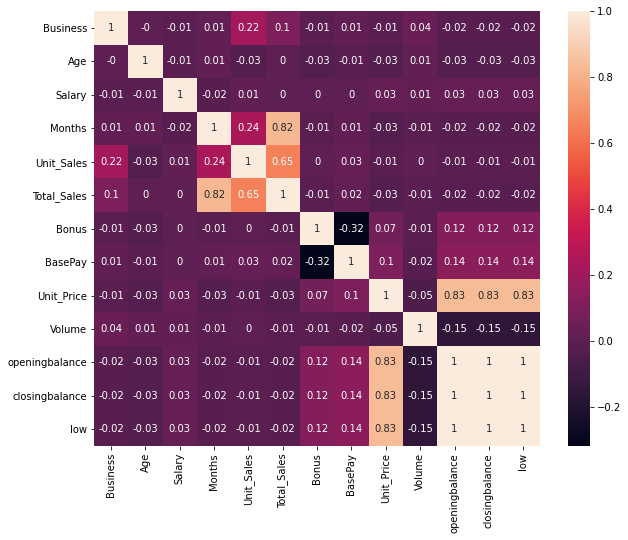

In [9]:
# Correlation among features

plt.figure(figsize=(10,8))
sns.heatmap(round(df.corr(),2),annot=True)

**The heatmap shows correlation between each column. The features 'Openingbalance','Closingbalance' and 'low' are perfect positive correlated with each other. Also their correlation with other features remains same. Therefore, we can choose to drop any two variables among them.**



In [10]:
var=df.drop(["Salary"],axis=1)

In [11]:
# Categorical columns and numerical columns

numCols = df.select_dtypes("number").columns
print("Numeric columns:",numCols,'\n')

catCols = df.select_dtypes("object").columns
print("Categorical columns:",catCols,'\n')

Numeric columns: Index(['Business', 'Age', 'Salary', 'Months', 'Unit_Sales', 'Total_Sales',
       'Bonus', 'BasePay', 'Unit_Price', 'Volume', 'openingbalance',
       'closingbalance', 'low'],
      dtype='object') 

Categorical columns: Index(['Gender', 'Dependancies', 'Calls', 'Type', 'Billing', 'Rating'], dtype='object') 



In [12]:
# Describes numerical column

df.describe()

,Business,Age,Salary,Months,Unit_Sales,Total_Sales,Bonus,BasePay,Unit_Price,Volume,openingbalance,closingbalance,low
count,5049.000000,5049.000000,5049.000000,5049.000000,5049.000000,5049.000000,5049.000000,5049.000000,5049.000000,5.049000e+03,5049.000000,5049.000000,5049.000000
mean,0.160032,39.012280,100326.490008,32.217271,64.772103,2270.139206,12686.158334,125667.312171,51.224542,6.735758e+06,43.517670,43.581984,43.037421
std,0.366672,10.600392,57743.911455,24.625027,30.161810,2266.530096,16020.185731,27660.975992,52.061379,1.613986e+07,37.111517,37.074444,36.686894
min,0.000000,18.000000,11.580000,0.000000,18.250000,18.800000,0.000000,0.000000,1.440000,0.000000e+00,3.680000,3.680000,3.650000
25%,0.000000,32.000000,50679.480000,9.000000,35.400000,388.600000,3071.600000,105934.710000,25.760000,1.281700e+06,21.980000,22.024999,21.752501
50%,0.000000,37.000000,100601.730000,28.000000,70.400000,1391.650000,10114.010000,123105.000000,39.240002,2.864200e+06,33.299999,33.340000,32.930000
75%,0.000000,44.000000,149139.130000,55.000000,89.950000,3739.800000,17176.630000,138854.690000,58.590000,6.205100e+06,51.130001,51.209946,50.529999
max,1.000000,88.000000,199970.740000,72.000000,118.750000,8684.800000,400184.250000,294580.020000,629.511067,3.208684e+08,313.903904,313.688694,312.432438


df.describe() gives statistics for the numeric column in the data. It gives summary Statistics along with mean, standard deviation and count of each row.

In [13]:
# Describes categorical columns

df.describe(include=['O'])

,Gender,Dependancies,Calls,Type,Billing,Rating
count,5049,5049,5049,5049,5049,5049
unique,2,2,2,3,2,2
top,Male,No,Yes,Month-to-month,Yes,No
freq,2555,3558,4582,2803,2979,3724


Here it can be observed that All the Categorical columns have 2 unique categories while type has 3. The top category with frequency can be obtained.

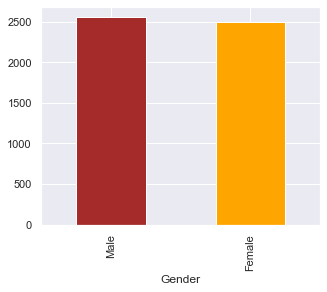

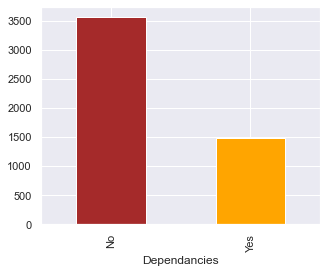

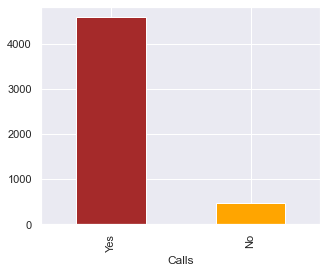

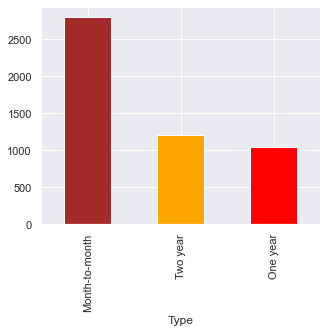

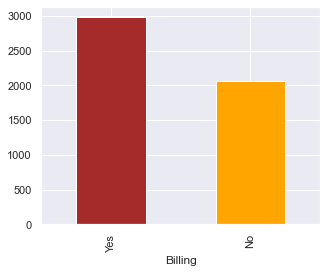

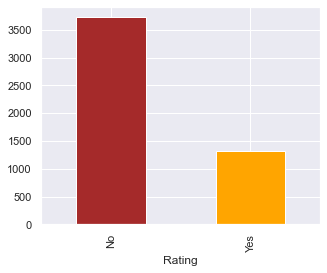

In [14]:
## Visualising each category in Categorical column.
sns.set_theme()
sns.set(rc={'figure.figsize':(5,4)})
col='brown','orange','red','black','yellow'
for features in catCols:
    df[features].value_counts().plot(kind='bar',color=col)
    plt.xlabel(features)
    plt.show()

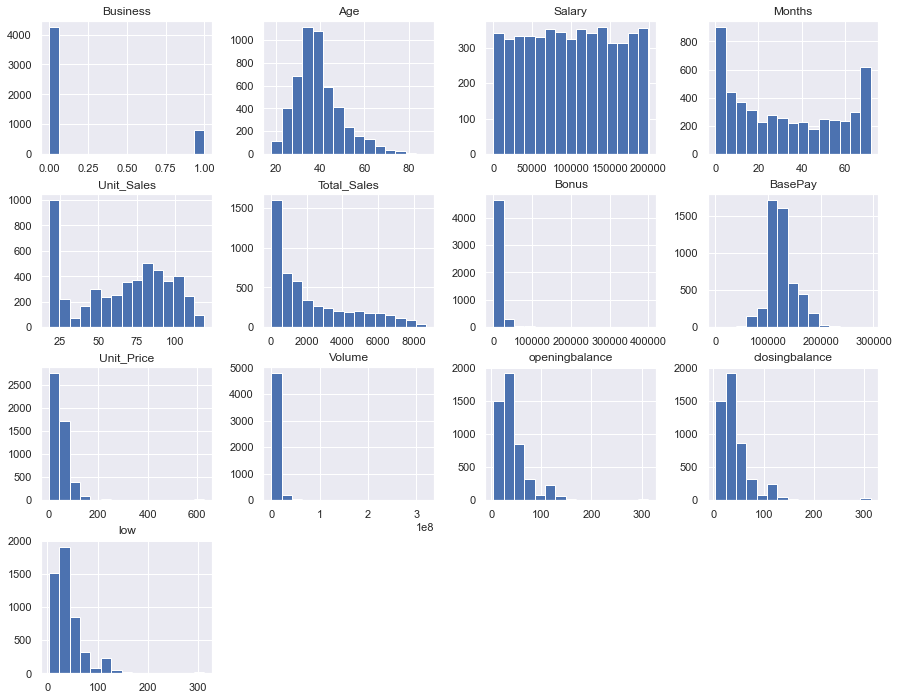

In [15]:
## Distribution of each column

df.hist(figsize=(15,12),bins = 15)
plt.title("Variable Distribution")
plt.show()

**Here it can be seen that 'Salary' is Uniformly distributed. Therefore, it can be said that the company gives approximately same salary to the employs have experience till 6 yrs.**

**While the columns 'Openingbalance', 'closing balance','low','Volume','Unit Price','Total Sales','Bonus','Age'are poitively skewed.**

**Unit Sales seems to be negatively skewed. While BasePay can be considered to be Normally distributed.**

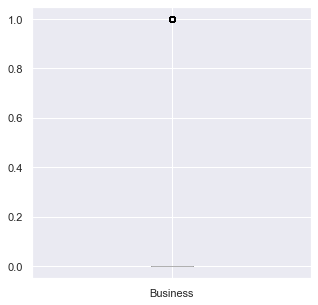

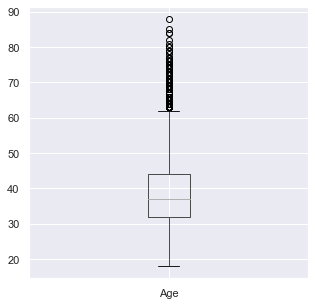

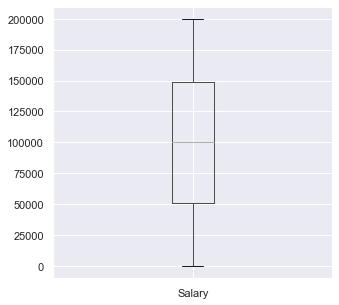

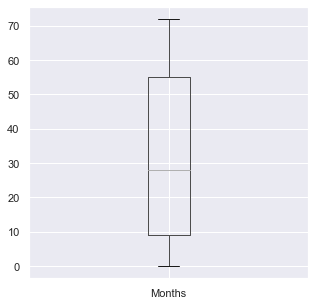

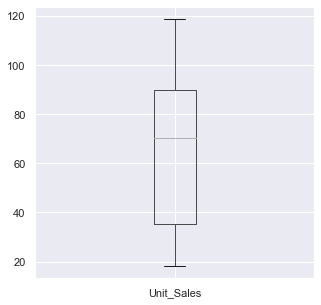

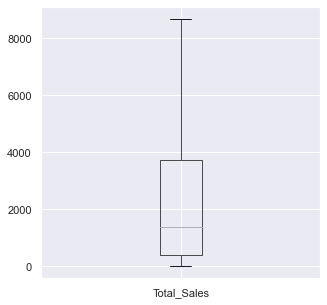

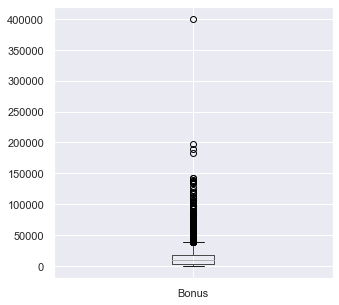

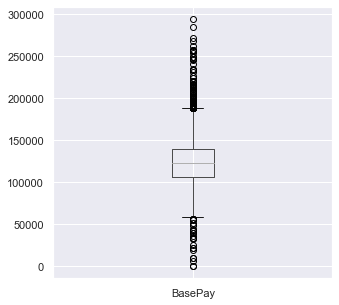

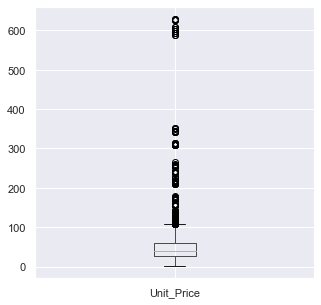

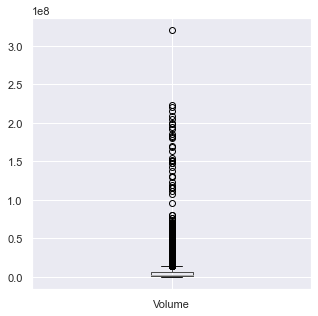

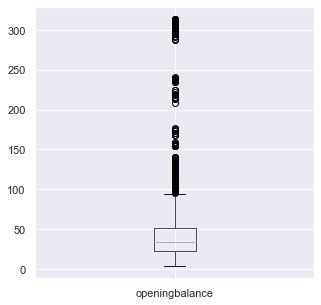

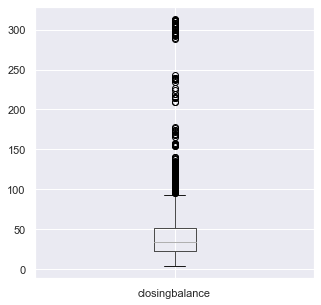

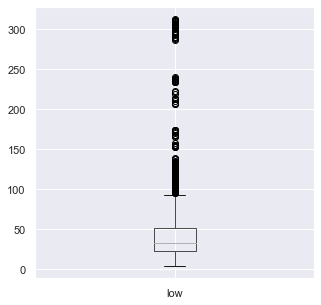

In [16]:
## Detection of Outliers

sns.set(rc={'figure.figsize':(5,5)})
for features in numCols:
    plt.figure()
    df.boxplot([features])

**The columns 'Age','Bonus', 'BasePay', 'Unit_Price', 'Volume','openingbalance','closingbalance', 'low' have outliers. Outlier are unusual values which do not follow the pattern of the data. Therefore, one must treat them before doing the analysis.**

In [17]:
outlier_num=df[['Age','Bonus', 'BasePay', 'Unit_Price', 'Volume','openingbalance','closingbalance', 'low']]

In [18]:
## Getting numeric value of outlies in the column and treating them

for i in outlier_num:
    q1=outlier_num[i].quantile(0.25)
    q3=outlier_num[i].quantile(0.75)
    iqr=q3-q1
    ul=q3+1.5*iqr
    ll=q1-1.5*iqr
    print("For",i,",","Lower limit:",round(ll,3),"&","Upper limit:",round(ul,3))
    print("No. of points above upper limit are", outlier_num[outlier_num[i]>ul].shape[0])
    print("No. of points below lower limit are",outlier_num[outlier_num[i]<ll].shape[0],'\n')
    outlier_num[i]=outlier_num[i].clip(ll,ul) 
    ## The outliers below lowerlimit are clipped to lower limit and above upper limit are clipped to Upper limit.
    

For Age , Lower limit: 14.0 & Upper limit: 62.0
No. of points above upper limit are 183
No. of points below lower limit are 0 

For Bonus , Lower limit: -18085.945 & Upper limit: 38334.175
No. of points above upper limit are 204
No. of points below lower limit are 0 

For BasePay , Lower limit: 56554.74 & Upper limit: 188234.66
No. of points above upper limit are 127
No. of points below lower limit are 26 

For Unit_Price , Lower limit: -23.485 & Upper limit: 107.835
No. of points above upper limit are 419
No. of points below lower limit are 0 

For Volume , Lower limit: -6103400.0 & Upper limit: 13590200.0
No. of points above upper limit are 504
No. of points below lower limit are 0 

For openingbalance , Lower limit: -21.745 & Upper limit: 94.855
No. of points above upper limit are 400
No. of points below lower limit are 0 

For closingbalance , Lower limit: -21.752 & Upper limit: 94.987
No. of points above upper limit are 401
No. of points below lower limit are 0 

For low , Lower l

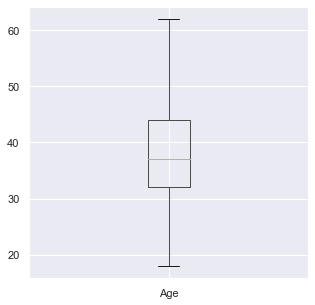

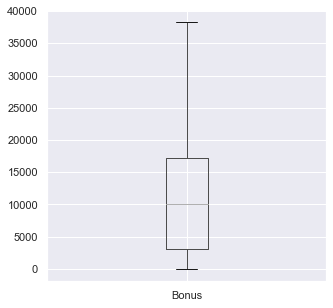

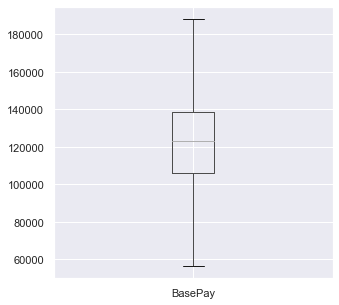

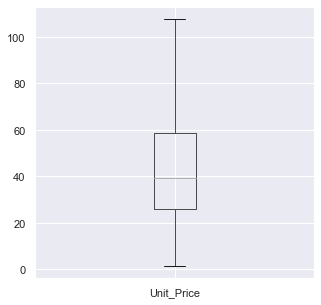

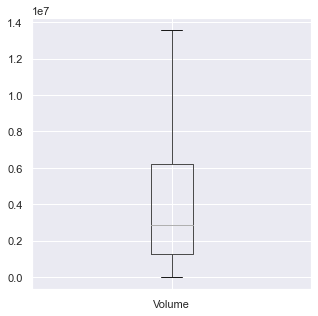

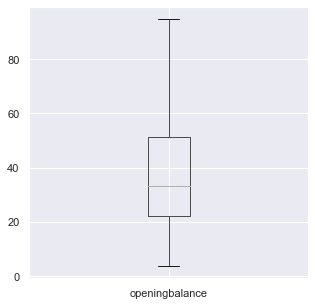

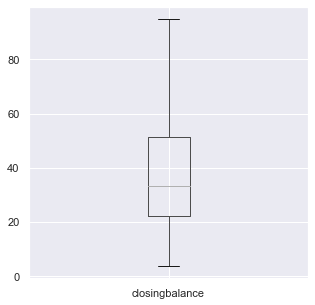

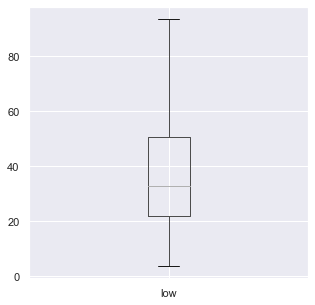

In [19]:
## Visualising treated columns

for i in outlier_num:
    plt.figure()
    outlier_num.boxplot([i])

plt.show()

Our data is free from outliers and ready for further analysis.

In [20]:
## Creating new data frame with treated columns.

df1=df.drop(['Age','Bonus', 'BasePay', 'Unit_Price', 'Volume','openingbalance','closingbalance', 'low'],axis=1)
new_df=pd.concat([df1,outlier_num],axis=1)

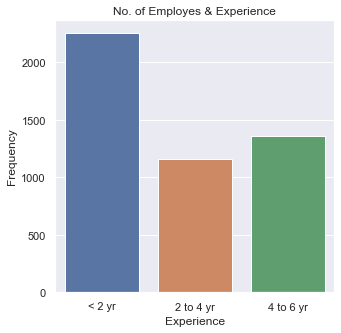

In [21]:
## Visualising number of employs with experience

exp_2yr = new_df[new_df.Months < 24].shape[0]
exp_4yr= new_df[(new_df.Months >= 24) & (new_df.Months < 48)].shape[0]
exp_6yr = new_df[(new_df.Months >= 48) & (new_df.Months < 72)].shape[0]
experience = ['< 2 yr', '2 to 4 yr', '4 to 6 yr']
exp_frq = [exp_2yr,exp_4yr,exp_6yr]
fig2 = sns.barplot(x=experience, y=exp_frq)
fig2.set(xlabel='Experience', ylabel='Frequency', title='No. of Employes & Experience')
plt.show()

**According to the given data, the company has maximum number of people with experience less than 2 yrs. While employs with experience 2 to 4 are minimum.**

In [22]:
new_df.groupby([new_df.Months < 24,'Gender'])['Salary'].mean()

Months  Gender
False   Female     96768.509405
        Male      101275.971677
True    Female     99822.612807
        Male      103948.045742
Name: Salary, dtype: float64

**Here it can be observed that the employs with experience less than 2 yrs are given more salary compared to other employs.
Also, Male employs are given slightly high Salary.**

In [23]:
new_df.groupby([(new_df.Months >= 24) & (new_df.Months < 48),'Gender'])['Salary'].mean()

Months  Gender
False   Female     99246.410692
        Male      102760.901701
True    Female     94363.849372
        Male      101423.227728
Name: Salary, dtype: float64

**Here it can be observed that the employs with experience between 2 to 4 yrs are given less salary compared to other employs. Also, Male employs are given slightly high Salary.**

In [24]:
new_df.groupby([(new_df.Months >= 48) & (new_df.Months < 72),'Gender'])['Salary'].mean()

Months  Gender
False   Female     97740.350520
        Male      103271.518984
True    Female     99292.038263
        Male      100233.757022
Name: Salary, dtype: float64

**Here it can be observed that the employs with experience 4 to 6 yrs yrs are given less salary compared to other employs. Also, Male employs are given slightly high Salary.**

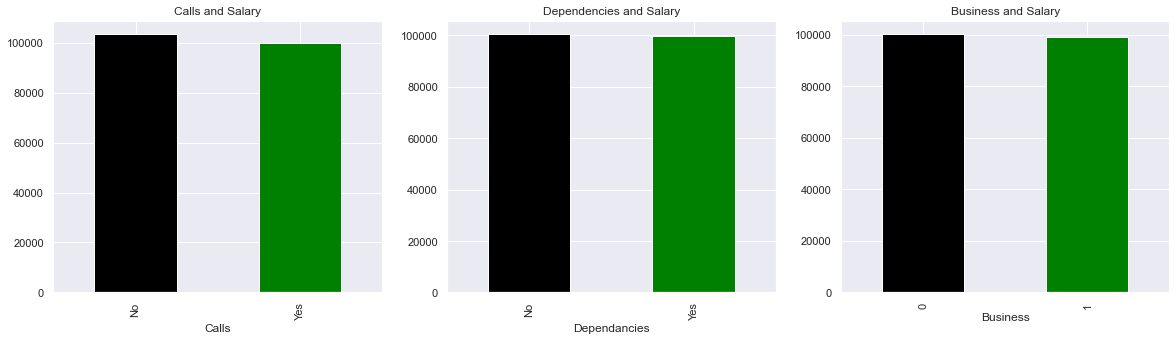

In [25]:
## Subplot to check dependence of some features on Salary

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
col='black','green'
new_df.groupby(['Calls'])['Salary'].mean().plot.bar(color=col)
plt.title("Calls and Salary")

plt.subplot(1,3,2)
new_df.groupby(['Dependancies'])['Salary'].mean().plot.bar(color=col)
plt.title("Dependencies and Salary")

plt.subplot(1,3,3)
new_df.groupby(['Business'])['Salary'].mean().plot.bar(color=col)
plt.title("Business and Salary")
plt.show()

**The employ getting Call facilities get slightly less Salary than those employ who dont get call facilities.**

**Dependencies has no effect on salary.**

**It also shows employ having business are paid insignificantly less than those not having business.**

<AxesSubplot:xlabel='Rating', ylabel='Bonus'>

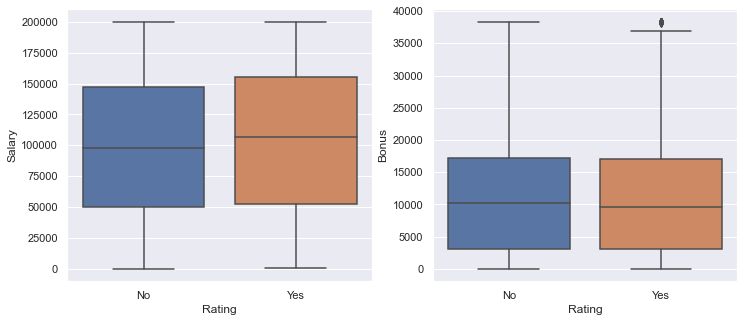

In [26]:
## Effect of Rating on Bonus and Salary

plt.figure(figsize=(12,5))
plt.subplot(1, 2,1) 
sns.boxplot(x=new_df['Rating'],y=new_df['Salary'],data=new_df)
plt.subplot(1, 2,2) 
sns.boxplot(x=new_df['Rating'],y=new_df['Bonus'],data=new_df)

**Employ with Ratings are paid more than employs with no Rating.**

**While Bonus remains remains unaffected by Ratings.**

<AxesSubplot:xlabel='Type', ylabel='Bonus'>

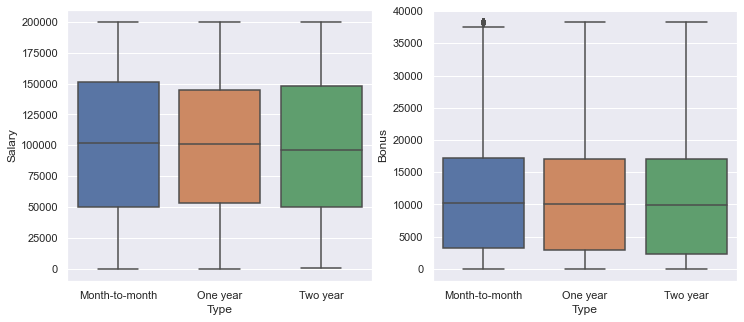

In [27]:
## Type of employment and Salary

plt.figure(figsize=(12,5))
plt.subplot(1, 2,1) 
sns.boxplot(x=new_df['Type'],y=new_df['Salary'],data=new_df)
plt.subplot(1, 2,2) 
sns.boxplot(x=new_df['Type'],y=new_df['Bonus'],data=new_df)

**Employs which are employed on the basis of Month-to-month are paid more than employs on two year basis followed by one year.**

**Again Bonus remains unaffected by the employment type.**

<AxesSubplot:xlabel='Business', ylabel='Salary'>

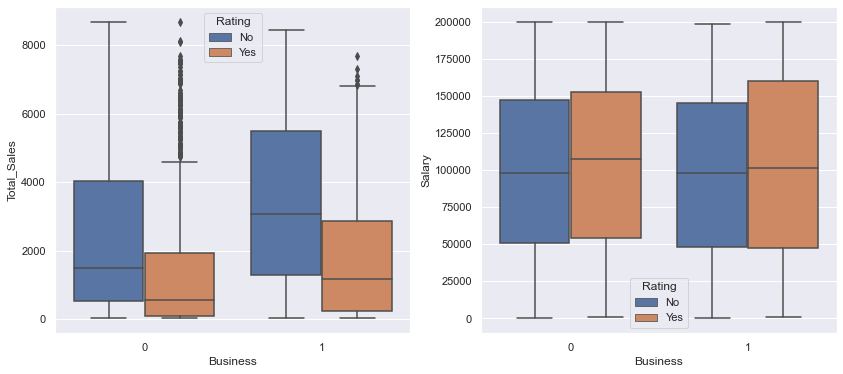

In [28]:
## Toytal Sales and Salary affected by business

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.set_theme()
sns.boxplot(x="Business",y="Total_Sales", hue="Rating",data=new_df)

plt.subplot(1,2,2)
sns.set_theme()
sns.boxplot(x="Business",y="Salary", hue="Rating",data=new_df)

**Employs with Business contributes more towards Total Sales than employs without business. Also it shows that the employs with no rating contributes significantly towards total sales.**

**While the Salary of Employs with Ratings and Business is higher than those without rating and Business.**

## Applying Algorithms

In [29]:
## Converting categories to numeric form

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for features in catCols:
    new_df[features] = le.fit_transform(new_df[features])

In [30]:
## Scaling the features so that the model doesnot consider the magnitude as weights of the features 

predictors=new_df.drop(['Salary','low','openingbalance'],axis=1)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features=pd.DataFrame(scaler.fit_transform(predictors),columns=predictors.columns)

In [31]:
features.head()
## Independent variables: Features
## Dependent variable: Salary

,Gender,Business,Dependancies,Months,Calls,Type,Billing,Unit_Sales,Total_Sales,Rating,Age,Bonus,BasePay,Unit_Price,Volume,closingbalance
0,-1.012155,-0.436487,-0.647345,-1.267831,-3.132341,-0.820672,0.833585,-1.157940,-0.988520,-0.596490,0.329524,2.705562,1.638962,2.253436,-0.553027,2.287594
1,0.987991,-0.436487,-0.647345,0.072402,0.319250,0.380016,-1.199638,-0.259364,-0.167956,-0.596490,0.228149,2.705562,1.193520,2.253436,-0.499703,2.287594
2,0.987991,-0.436487,-0.647345,-1.227217,0.319250,-0.820672,0.833585,-0.362153,-0.953971,1.676474,0.329524,0.501194,2.449405,2.253436,-0.475027,2.287594
3,0.987991,-0.436487,-0.647345,0.519146,-3.132341,0.380016,-1.199638,-0.745125,-0.189467,-0.596490,0.025399,2.705562,-1.844160,2.253436,-0.590675,2.287594
4,-1.012155,-0.436487,-0.647345,-1.227217,0.319250,-0.820672,0.833585,0.196556,-0.934776,1.676474,0.430899,2.705562,0.354240,2.253436,-0.733728,2.287594


In [32]:
## Splitting data in train and test 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,df['Salary'],test_size= 0.20,random_state=45)

In [33]:
X_train.shape, X_test.shape

((4039, 16), (1010, 16))

## Random Forest Regressor

Since no direct Linear Relationship of features with target was observed therefore I chose Random Forest for prediction purpose.

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor(random_state=42)
rf = rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

print("score_train",rf.score(X_train, y_train),"\n")
print("score_test:",rf.score(X_test,y_test),'\n')
 
# calculate mean square error
mse_test=mean_squared_error(y_test,predictions)
mse_train=mean_squared_error(y_train,rf.predict(X_train))
print("mse on train data=",mse_train,'\n')
print("rmse on train data=",np.sqrt(mse_train),'\n')
print("mse on test data=",mse_test,'\n')
print("rmse on test data=",np.sqrt(mse_test),'\n')

score_train 0.8566093104654567 

score_test: -0.05204477369831606 

mse on train data= 482914422.83113486 

rmse on train data= 21975.313941583063 

mse on test data= 3357934924.0086546 

rmse on test data= 57947.69127418844 



The above scores suggest that the Random Forest Regressor Performs well on the train data but not on test data. Its overfitting.

***Hyperparameter tuning***

In [35]:
## Applying RandomizedSearchCV to tune the parameters of the Random Forest so that the model perfor well on test data too.

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# specify parameters and distributions to sample from
param_dist = {"max_depth": [3,5,8,10, None],
              "max_features": sp_randint(1, X_train.shape[1]),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "n_estimators": sp_randint(200,500 )}

In [37]:
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 5, 8, 10, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D7116BBF10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D7116BBEB0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D7116AE190>},
                   random_state=42)

In [38]:
print(random_search.best_params_)

{'bootstrap': False, 'max_depth': 3, 'max_features': 3, 'min_samples_split': 6, 'n_estimators': 334}


In [39]:
y_preds = random_search.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_preds)))

56545.84768408821


Randomizedsearchcv gave {'bootstrap': False, 'max_depth': 3, 'max_features': 3, 'min_samples_split': 6, 'n_estimators': 334} as
best parameters. Also there is decrease in the rmse of the test data.

***Feature Importance***

In [41]:
pip install shap

  Using cached shap-0.39.0-cp38-cp38-win_amd64.whl (414 kB)
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.


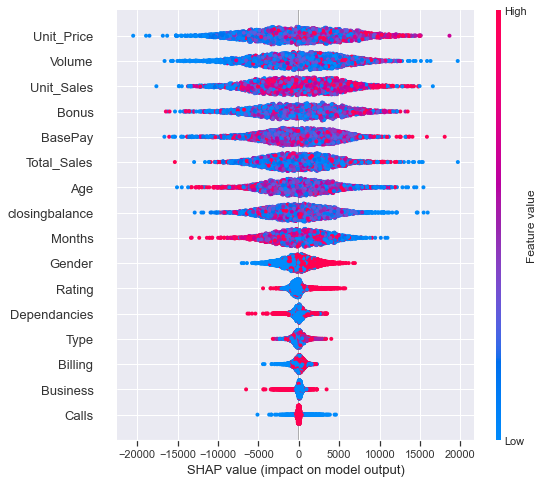

In [42]:
## SHAP values interpret the impact of having a certain value for a given feature in comparison to the prediction we'd make if
## that feature took some baseline value.

import shap 
explainer = shap.TreeExplainer(rf) 
shap_values = explainer.shap_values(X_train) 
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)

**For the above fitted model the features 'Unit Price','Volume','Unit Sales','Bonus','BasePay','TotalSales','Age','Closingbalance' and Month effets the prediction of Salary most. Visualising same thing using bar plot we get the below plot.**

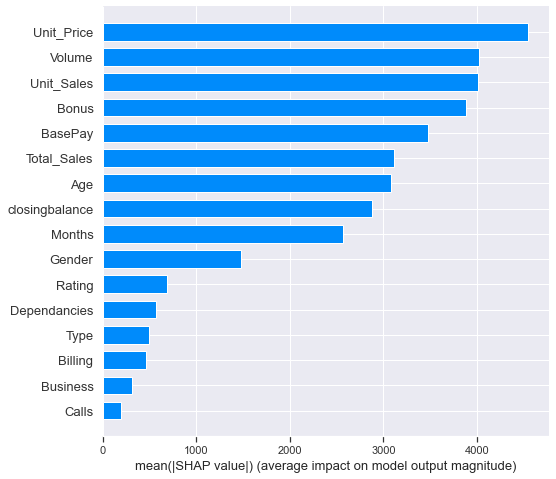

In [43]:
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns, plot_type='bar')

In [44]:
## Checking the important features by the method of ExtraTreesRegressor

y=df['Salary']
## Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(features,y)


ExtraTreesRegressor()

In [45]:
print(model.feature_importances_)

[0.00151259 0.02824452 0.03397959 0.08343365 0.0166561  0.03874351
 0.03700952 0.08986196 0.08234845 0.01599953 0.10627008 0.09470501
 0.09953009 0.08876223 0.09745327 0.0854899 ]


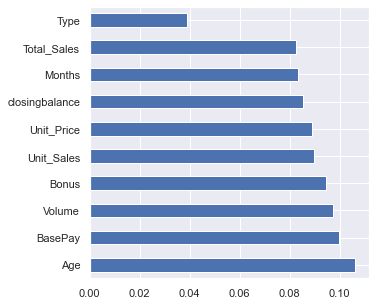

In [46]:
## Plot graph of feature importance for better visualization
feat_imp=pd.Series(model.feature_importances_,index=features.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.show()

**Using ExtraTreeRegressor also gives us the features as obtained by Shap.**

In [47]:
# training data with 8 most important features
train_x_if = X_train[['Age','BasePay','Volume','Bonus','Unit_Sales','Unit_Price','closingbalance','Months','Total_Sales']]
# test data with 8 most important features
test_x_if = X_test[['Age','BasePay','Volume','Bonus','Unit_Sales','Unit_Price','closingbalance','Months','Total_Sales']]

# fit the model with the training data
random_search.fit(train_x_if, y_train)

# predict the target on the training and test data
predict_train_with_if = random_search.predict(train_x_if)
predict_test_with_if = random_search.predict(test_x_if)

# Root Mean Squared Error on the train and test data

print('RMSE on train data:', np.sqrt(mean_squared_error(y_train, predict_train_with_if)))
print('RMSE on test data: ', np.sqrt(mean_squared_error(y_test, predict_test_with_if)))

RMSE on train data: 57516.830282736504
RMSE on test data:  56643.402132270945


**The selected features give better result than the all features used in the data. Without optimization the random forest with all features gave rmse of 57947.691 and Random Forest with selected important features gave the rmse of 56643.40.**

## Lasso Regression

As Lasso Regression does regularization and also shrinks the least contributing features to zero, So choose Lasso regression to
observe the difference in rmse.

In [48]:
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso
 
# Train the model
lasso = Lasso()
lasso.fit(X_train, y_train)
y_predl = lasso.predict(X_test)

print("score_train",lasso.score(X_train, y_train),"\n")
print("score_test:",lasso.score(X_test,y_test),'\n')
 
# calculate mean square error
mean_squared_error_lasso = np.mean((y_predl - y_test)**2)
print("mse on test data=",mean_squared_error_lasso,'\n')
print("rmse test on test data =",np.sqrt(mean_squared_error_lasso),'\n')

lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = X_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
print("Intercept term is:",lasso.intercept_,'\n')
print(lasso_coeff)

score_train 0.005876238157297542 

score_test: 0.000993010528607119 

mse on test data= 3188647995.9233212 

rmse test on test data = 56468.11486071871 

Intercept term is: 100824.0083537846 

           Columns  Coefficient Estimate
0           Gender           1967.842598
1         Business           -603.403060
2     Dependancies           -353.182390
3           Months          -4568.589092
4            Calls           -836.773273
5             Type            617.052653
6          Billing            279.806752
7       Unit_Sales           -637.807541
8      Total_Sales           4560.887918
9           Rating           1377.335965
10             Age           -764.247396
11           Bonus            738.827709
12         BasePay             71.659883
13      Unit_Price           3128.416976
14          Volume           1214.651924
15  closingbalance           -854.143776


**The r2 for test and train both remains close to zero. The rmse on test data is 56468.11 similar to optimized random forest.**

# KNN

Lets check the data on distance based approach KNN!

In [49]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors = 20)
knn.fit(X_train,y_train)
print("sore_train:",knn.score(X_train,y_train),"\n")
print("score_test:",knn.score(X_test,y_test),"\n")

from sklearn.metrics import mean_squared_error
print("rmse_train:",np.sqrt(mean_squared_error(y_train,knn.predict(X_train))),"\n")
print("rmse_test:",np.sqrt(mean_squared_error(y_test,knn.predict(X_test))),"\n")

sore_train: 0.05766425940627029 

score_test: -0.05263776686946775 

rmse_train: 56334.88903128447 

rmse_test: 57964.02030563678 



**The r2 remain too low as in previous both models. Also the rmse is 57964.02.**

In [50]:
## Hyper paramreter tuning

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

kfold = KFold(n_splits=5, shuffle=True, random_state=7)
# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [20,22,24,26,28,30], 'weights': ['uniform','distance']}]
# Search for best hyperparameters
grid = GridSearchCV(estimator=knn, param_grid=hp_candidates, cv=kfold, scoring='r2')
grid.fit(X_train, y_train)
# Get the results
print(grid.best_estimator_,'\n')
print(grid.best_params_,'\n')
print("Rmse on test",np.sqrt(mean_squared_error(y_test,grid.predict(X_test))))

KNeighborsRegressor(n_neighbors=30) 

{'n_neighbors': 30, 'weights': 'uniform'} 

Rmse on test 57384.26820539612


**After tuning the parameters the rmse came down to  57384.26. However didnt vary much.**

***From modelling part we get that the optimized Random Forest gives least rmse compared to other models. Our algorithm gives the prediction of Salary with the difference of approximately +_56468.***

## Introduction of missing values and comparision

In [51]:
## Introducing 10 % missing values in the whole data

df_nan=df.mask(np.random.random(df.shape)<=0.01)
df_nan.isnull().sum()

Gender            45
Business          51
Age               48
Salary            59
Dependancies      48
Months            44
Calls             57
Type              50
Billing           49
Unit_Sales        62
Total_Sales       65
Rating            56
Bonus             55
BasePay           44
Unit_Price        56
Volume            48
openingbalance    74
closingbalance    35
low               41
dtype: int64

In [52]:
df_nan["Total_Sales"]=pd.to_numeric(df_nan.Total_Sales,errors='coerce')

In [53]:
## Imputing the missing missing values with mean

for features in ['Age', 'Salary','Total_Sales','Months', 'Unit_Sales','Bonus', 'BasePay', 'Unit_Price', 'Volume', 'openingbalance', 'closingbalance', 
                 'low']:df_nan[features].fillna((df_nan[features].mean()),inplace=True)
    
for features in ['Business','Gender', 'Dependancies', 'Calls', 'Type', 'Billing', 'Rating']:
    df_nan[features].fillna((df_nan[features].mode()[0]),inplace=True)

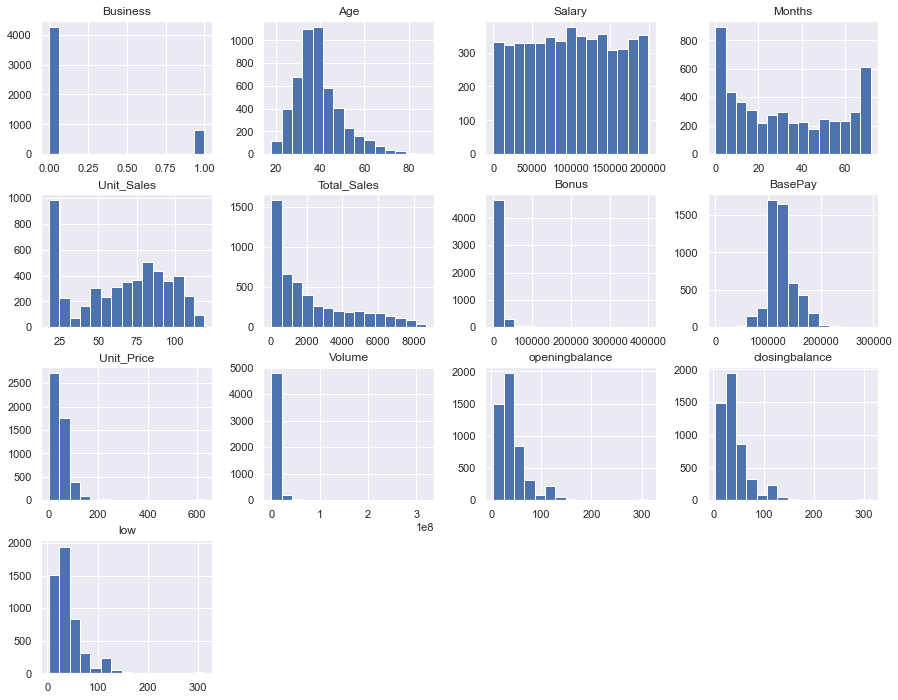

In [54]:
## Checking the distribution of each features after imputing the values witrh the mean

df_nan.hist(figsize=(15,12),bins = 15)
plt.show()

**From above plot it can be seen that the distribution of each feature is almost similar to the original data. So there will be
no much significant difference in the result.**

In [55]:
# Categorical columns and numerical columns

numCols_nan = df_nan.select_dtypes("number").columns
print("Numeric columns:",numCols,'\n')

catCols_nan = df_nan.select_dtypes("object").columns
print("Categorical columns:",catCols,'\n')

Numeric columns: Index(['Business', 'Age', 'Salary', 'Months', 'Unit_Sales', 'Total_Sales',
       'Bonus', 'BasePay', 'Unit_Price', 'Volume', 'openingbalance',
       'closingbalance', 'low'],
      dtype='object') 

Categorical columns: Index(['Gender', 'Dependancies', 'Calls', 'Type', 'Billing', 'Rating'], dtype='object') 



In [56]:
## Label encoding the features

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for features in catCols:
    df_nan[features] = le.fit_transform(df_nan[features])

In [57]:
## Using the obtained best features for the prediction purpose

X=df_nan[['Age','BasePay','Volume','Bonus','Unit_Sales','Unit_Price','closingbalance','Months','Total_Sales']]

In [58]:
from sklearn.model_selection import train_test_split
Xn_train,Xn_test,yn_train,yn_test=train_test_split(X,df_nan[['Salary']],test_size=0.2,random_state=1)

In [59]:
## Using Random Forest with the best parameters obtained for predicting values

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor(random_state=15,bootstrap=False, max_depth= 3, max_features=3, min_samples_split= 6, n_estimators=334)
rf = rf.fit(Xn_train, yn_train)
predictions = rf.predict(Xn_test)

print("score_train",rf.score(Xn_train, yn_train),"\n")
print("score_test:",rf.score(Xn_test,yn_test),'\n')
 
# calculate mean square error
mse_test=mean_squared_error(yn_test,predictions)
mse_train=mean_squared_error(yn_train,rf.predict(Xn_train))
print("mse on train data=",mse_train,'\n')
print("rmse on train data=",np.sqrt(mse_train),'\n')
print("mse on test data=",mse_test,'\n')
print("rmse on test data=",np.sqrt(mse_test),'\n')

score_train 0.019692614543419973 

score_test: -0.00553566284790219 

mse on train data= 3219632245.484664 

rmse on train data= 56741.80333303361 

mse on test data= 3357255276.1578074 

rmse on test data= 57941.82665534292 



**Rmse of 57994 is obtained on this data, not much difference than the original data.** 

********************************************************************************************************************************

## Conclusions:

***Some Key insights drawn from the data are:***

**1) The target variable Salary is uniformly distributed.** 

**2) According to the given data, the company has employs of experience till 6 yrs. Maximum number of people with experience less than 2 yrs. While employs with experience 2 to 4 are minimum.**

**3) Employs with experience less than two years were paid more.**

**4) Males were paid slightly more than Females**

**5) The employ getting Call facilities get slightly less Salary than those employ who dont get call facilities.
Dependencies and Business has almost no effect on salary.**

**6)Employ with Ratings are paid more than employs with no Rating. While Bonus remains remains unaffected by Ratings.**

**7) Employs with Business contributes more towards Total Sales than employs without business. Also it shows that the employs with no rating contributes significantly towards total sales.**

**8)The optimized Regression models gave approximately the following rmse**

***Random Forest:*** **56643.40**

***Lasso regression:*** **56548**

***KNN:*** **57964**


**9) R2 remained approximately close to zero in all cases. Implying that our independent features dont prove much useful in explaining the variability in Salary. May be mostly because the assumptions of Regression were not satisfied.**

**Normalising data by trying transformation didnot suffice as it could no establish linear relation between target and other features. The assumptions still failed.**

**10) Introduction of missing values and imputing them with mean did not affect the behaviour of the data significantly.**